# Lung Cancer

This <span style="color:green">Jupyter Notebook</span> file aims to perform statistical predictive models in the field of medicine, specifically regarding lung cancer.

## Objectives:

1. Perform an exploratory analysis to clean the database.
2. The objective of the predictive model will be <span style="color:red">"Lung Cancer"</span>.
3. - [Modelos:](#Seccion-1)
    - Ridge-Lasso.
    - Regression. 
    - Logistic Regression.
4. - [Ensemble models:](#Seccion-2) 
    - Confusion Matrix. 
    - ROC Curve. 
    - Precision-Recall Curve.
5. - [Random Forest:](#Seccion-3)
    
### Attribute information:

- Gender: M(male) = 1, F(female) = 2
- Age: Age of the patient
- Smoking: YES=2 , NO=1.
- Yellow fingers: YES=2 , NO=1.
- Anxiety: YES=2 , NO=1.
- Peer_pressure: YES=2 , NO=1.
- Chronic Disease: YES=2 , NO=1.
- Fatigue: YES=2 , NO=1.
- Allergy: YES=2 , NO=1.
- Wheezing: YES=2 , NO=1.
- Alcohol: YES=2 , NO=1.
- Coughing: YES=2 , NO=1.
- Shortness of Breath: YES=2 , NO=1.
- Swallowing Difficulty: YES=2 , NO=1.
- Chest pain: YES=2 , NO=1.
- Lung Cancer: YES , NO.

In [96]:
#==================================================================================
#Import Libraries
#==================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import pearsonr, f_oneway

from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score, accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Imports several metrics for evaluating regression and classification models.
from sklearn.metrics import precision_recall_fscore_support as score

# Used for data preprocessing and transformation
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize, LabelEncoder

# A Pipeline is a sequence of steps for processing and transforming data
from sklearn.pipeline import Pipeline

# A RandomTreeDecision
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [97]:
Cancer = pd.read_csv('survey lung cancer.csv')

Cancer_df = pd.DataFrame(Cancer)

Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [98]:
Cancer_df.shape[0]*Cancer_df.shape[1] # All entries values

4944

In [99]:
Cancer_df['LUNG_CANCER'] = Cancer_df['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})
Cancer_df['GENDER'] = Cancer_df['GENDER'].replace({'M': 1, 'F': 2})

X = Cancer_df.copy()
y = X['LUNG_CANCER']  # Target
X.drop(['LUNG_CANCER'], axis=1, inplace=True)   # Delete Target

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

## Lasso Regresion 📈

In [100]:
# Scale the data
Scaler = StandardScaler()
X_train_full_Scaled = Scaler.fit_transform(X_train_full)
X_valid_full_Scaled = Scaler.transform(X_valid_full)

# Create Lasso Model
Model_Lasso = Lasso(alpha=0.1)

# Train Lasso Model
%time Model_Lasso.fit(X_train_full_Scaled, y_train)

# Valid Model
Lasso_test_score = Model_Lasso.score(X_valid_full_Scaled, y_valid)

# Print Score for Lasso Model
print('Puntuación del modelo de Lasso {}'.format(Lasso_test_score))

CPU times: total: 15.6 ms
Wall time: 3 ms
Puntuación del modelo de Lasso -0.009533792370351346


## Ridge Regresion 📈

In [101]:
# Create Ridge Model
Model_Ridge = Ridge(alpha=0.1)

# Train Ridge Model
%time Model_Ridge.fit(X_train_full, y_train)

# Valid Model
Ridge_test_score = Model_Ridge.score(X_valid_full, y_valid)

# Print Score for Ridge Model
print('Puntuación del modelo de Ridge {}'.format(Ridge_test_score))

CPU times: total: 0 ns
Wall time: 2 ms
Puntuación del modelo de Ridge 0.3936212256314181


### ⚠ Important ⚠

For the Ridge model, the $r^2$ coefficient is $0.3936$ . While it could be better, it is still significantly higher than the score from the Lasso model, which was negative, indicating that the model describes the data worse.

## Logistic Regression

In [102]:
logreg = LogisticRegression() # Create Logistic Regression Model
%time logreg.fit(X_train_full_Scaled, y_train) # Fit Model

CPU times: total: 15.6 ms
Wall time: 11 ms


LogisticRegression()

In [103]:
%time y_pred_logreg = logreg.predict(X_valid_full_Scaled)

CPU times: total: 0 ns
Wall time: 0 ns


In [104]:
print("Accuracy:", accuracy_score(y_valid, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_valid, y_pred_logreg))

Accuracy: 0.9032258064516129
Confusion Matrix:
[[ 5  5]
 [ 1 51]]
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.50      0.62        10
           2       0.91      0.98      0.94        52

    accuracy                           0.90        62
   macro avg       0.87      0.74      0.78        62
weighted avg       0.90      0.90      0.89        62



## Confusion Matrix Display

CPU times: total: 15.6 ms
Wall time: 2 ms


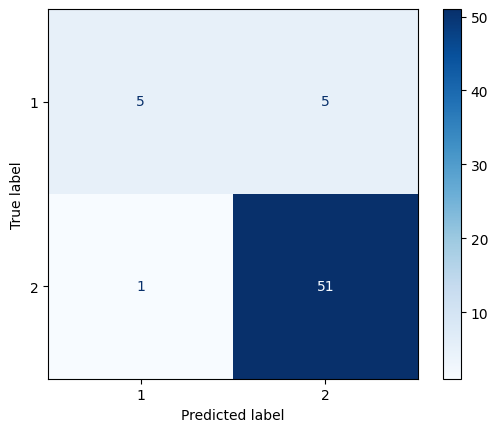

In [105]:
%time Cm_LogReg = confusion_matrix(y_valid, y_pred_logreg)

# Display the confusion matrix

Disp_Cm_LogReg = ConfusionMatrixDisplay(confusion_matrix=Cm_LogReg, display_labels=logreg.classes_)
Disp_Cm_LogReg.plot(cmap=plt.cm.Blues)

plt.show()

### Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

### Presicion = $\frac{TP}{TP + FP}$

### Recall = $\frac{TP}{TP + FN}$

### F_1 SCORE = $\frac{Presicion*Recall}{Presicion + Recall}$

## <span style="color:red">ROC Curve</span>

CPU times: total: 0 ns
Wall time: 0 ns


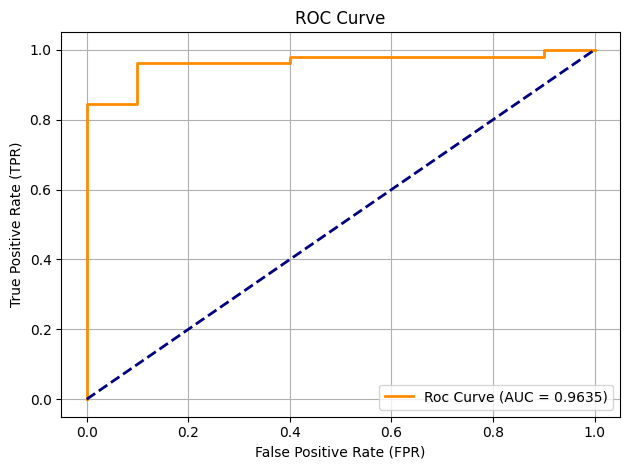

In [167]:
# Predict the probabilities on the test set
%time y_prob_LogReg = logreg.predict_proba(X_valid_full_Scaled)[:, 1]

y_valid_bin = label_binarize(y_valid, classes=[1, 2])  # Specify the classes you have in y_valid

# Calculate the ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_valid_bin, y_prob_LogReg)
roc_auc = auc(fpr, tpr)

fig_2 = plt.figure('ROC_Curve')
ax2 = fig_2.add_subplot()

ax2.plot(fpr, tpr, color='darkorange', lw=2, label='Roc Curve (AUC = %0.4f)' %roc_auc)
ax2.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

#ax2.set_xlim([0.0, 1.0])
#ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.grid()

ax2.set_title('ROC Curve')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

CPU times: total: 0 ns
Wall time: 1e+03 µs


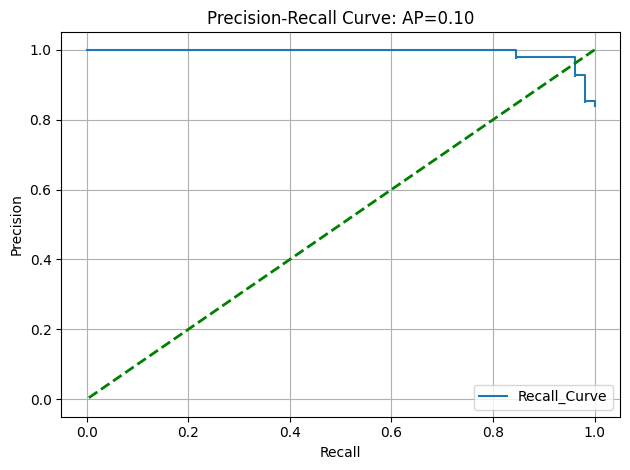

In [164]:
# Calculate precision-recall curve
%time Precision_LogReg, Recall_LogReg, _ = precision_recall_curve(y_valid_bin, y_prob_LogReg)

# Calculate the area under the curve
Average_Precision = average_precision_score(y_valid, y_prob_LogReg)

fig_3 = plt.figure('Precision_Recall_Curve')
ax3 = fig_3.add_subplot()

ax3.step(Recall_LogReg, Precision_LogReg, where='post', label='Recall_Curve')
ax3.plot([1,0], [1,0], color='g', lw=2, linestyle='--')

#ax2.set_xlim([0.0, 1.0])
#ax2.set_ylim([0.0, 1.05])
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')

plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(Average_Precision))
ax3.grid()
ax3.legend()

plt.tight_layout()
plt.show()

As it had been discussed before, <span style="color:green">logistic regression</span>  had a quite satisfactory result, and the <span style="color:red">ROC Curve</span> and <span style="color:red"> Precision Recall Curve</span> corroborates it.

## Random Forest  🌲

In [137]:
# Specify DecisionTreeRegressor Model 
DTF_Model = DecisionTreeRegressor(random_state=1)

# Fit Model
DTF_Model.fit(X_train_full, y_train)

# Make validation predictions and calculate mean absolute error
Predict_DTF = DTF_Model.predict(X_valid_full)
Predict_DTF_MAE = mean_absolute_error(y_valid, Predict_DTF)

pred_df= pd.DataFrame({
    'y_valid': y_valid,
    'Predict_DTF': Predict_DTF
})

print('Validation MAE when not specifying max_leaf_nodes : {}'.format(Predict_DTF_MAE))
pred_df

Validation MAE when not specifying max_leaf_nodes : 0.0967741935483871


,y_valid,Predict_DTF
63,2,2.0
231,2,2.0
167,2,2.0
159,1,2.0
189,2,2.0
...,...,...
34,1,2.0
250,2,2.0
33,2,2.0
21,2,2.0


### Compare Different Tree Sizes 🌲 🌳

In [143]:
def get_mae(max_leaf_nodes, X_train_full, X_valid_full, y_train, y_valid):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train_full, y_train)
    preds_val = model.predict(X_valid_full)
    mae = mean_absolute_error(y_valid, preds_val)
    return(mae)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
val_my_mae = {max_leaf_nodes: get_mae(max_leaf_nodes, X_train_full, X_valid_full, y_train, y_valid) for max_leaf_nodes in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(val_my_mae, key=val_my_mae.get)

print('Leaf Nodes:', val_my_mae)
print()
print('Best Tree Size:{} and best MAE {}'.format(best_tree_size, min(val_my_mae.values())))

Leaf Nodes: {5: 0.1770439807560516, 25: 0.13914299470389985, 50: 0.0967741935483871, 100: 0.0967741935483871, 250: 0.0967741935483871, 500: 0.0967741935483871}

Best Tree Size: 50


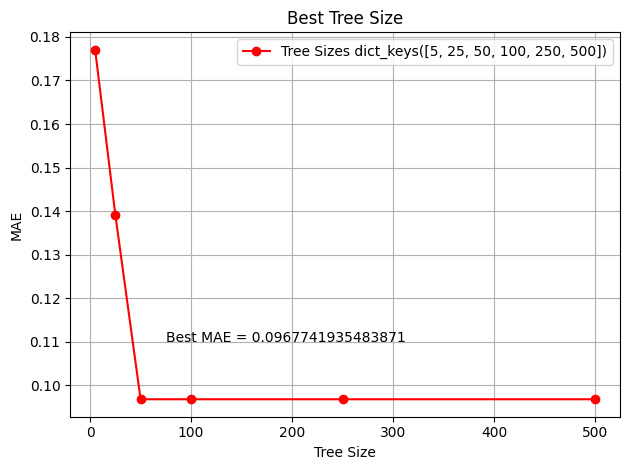

In [162]:
fig_4 = plt.figure('Best_Tree_Size')
ax4 = fig_4.add_subplot()

ax4.plot(list(val_my_mae.keys()), list(val_my_mae.values()),  color='r', marker= 'o', label='Tree Sizes {}'.format(val_my_mae.keys()))
ax4.text(75, 0.11, 'Best MAE = {}'.format(min(val_my_mae.values())))

ax4.set_xlabel('Tree Size')
ax4.set_ylabel('MAE')

plt.title('Best Tree Size')
plt.grid()
ax4.legend()

plt.tight_layout()
plt.show()